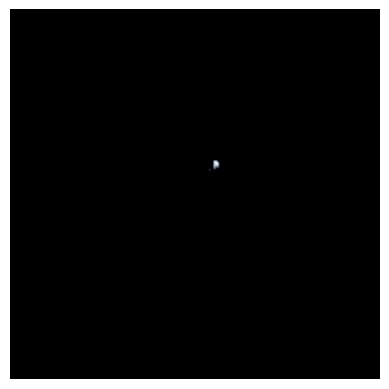

In [43]:
# filePath = "./images/data/"
filePath = "F:\\brain-tumor-target-4\\train\\"

filePath2 = "F:\\rsna-miccai-brain-tumor-radiogenomic-classification\\train\\"

import cv2 as cv
import pydicom
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

def showImage(image, cmap='bone'):
    plt.imshow(image, cmap='bone')
    plt.axis("off")
    plt.show()


img = pydicom.dcmread(filePath2 + f"00054/T2w/Image-361.dcm")
image = img.pixel_array
showImage(image)

In [44]:
def convert(image):
    info = np.iinfo(image.dtype)
    data = image.astype(np.uint8) / info.max
    data *= np.finfo(np.float64).max
    return data.astype(np.float64)

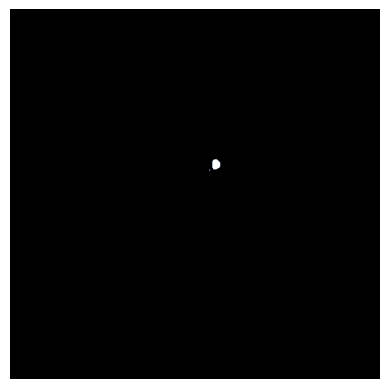

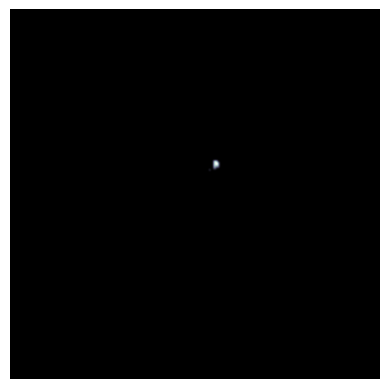

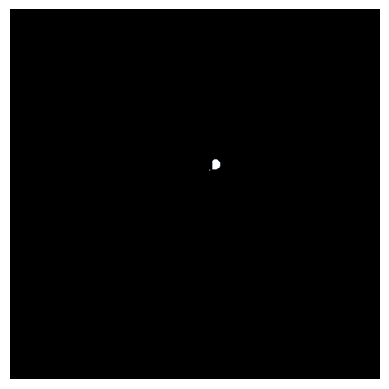

In [45]:
# gray = cv.cvtColor(image, cv.COLOR_BAYER_RG2GRAY)

blurred = cv.GaussianBlur(image, (5, 5), 0)
thresh = cv.threshold(blurred, 100, 255, cv.THRESH_BINARY)[1]

showImage(thresh)
showImage(blurred)

open = cv.morphologyEx(thresh, cv.MORPH_OPEN, np.ones((3, 3), np.uint8), iterations=50)
close = cv.morphologyEx(thresh, cv.MORPH_CLOSE, np.ones((3, 3), np.uint8), iterations=50)
# showImage(thresh)
# showImage(open) 
showImage(close)

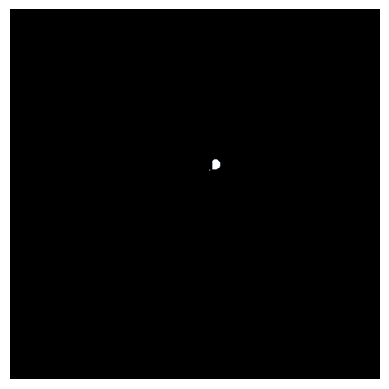

In [46]:
showImage(np.uint8(close))

In [52]:
cv.countNonZero(close)

133

: 

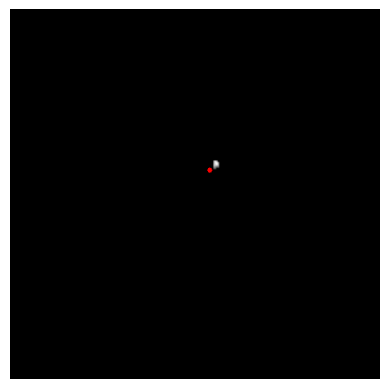

In [47]:
contours, hierarchy = cv.findContours(np.uint8(close), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

iimg = cv.merge([image, image, image])

ff = cv.normalize(iimg, None, 0, 255, cv.NORM_MINMAX)

cnt = cv.drawContours(ff, contours, 0, (255, 0, 0), 5)

showImage(cnt)

In [48]:
if len(contours) == 0:
    resized = cv.resize(image, (224, 224), cv.INTER_LINEAR)
    showImage(resized)

In [49]:
c = contours[0]

extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

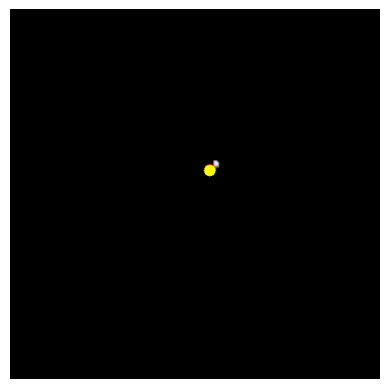

In [50]:
cv.drawContours(image, [c], -1, (0, 255, 255), 2)
cv.circle(cnt, extLeft, 8, (0, 0, 255), -1)
cv.circle(cnt, extRight, 8, (0, 255, 0), -1)
cv.circle(cnt, extTop, 8, (255, 0, 0), -1)
cv.circle(cnt, extBot, 8, (255, 255, 0), -1)
# show the output image
showImage(cnt)

In [51]:
img = image[extTop[1]: extBot[1], extLeft[0]: extRight[0]]

resized = cv.resize(img, (224, 224), interpolation=cv.INTER_LINEAR)

showImage(resized)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
